# FFT with set of resonator differential equations

## The damped harmonic oscillator

We seek the solution of the differential equation
$$
    \ddot x + 2\gamma\omega_0 \dot x + \omega_0^2 x = f(t),\qquad x(0)=x_0,\;\dot x(0) = v(0).
$$
In Fourier space
$$
    (-\omega^2 -2i\gamma\omega\omega_0 +\omega_0^2)x(\omega) = f(\omega).
$$
The roots of the left hand side are
$$
    \omega_\pm = \omega_0(-i\gamma\pm\sqrt{1-\gamma^2}) \quad\rightarrow\quad e^{-i\omega_\pm t} = e^{-\gamma\omega_0 t \pm i\Omega t},
$$
where $\Omega=\omega_0\sqrt{1-\gamma^2}$. So the general solution reads
$$
    x(\omega) = A_+\delta(\omega-\omega_+) + A_-\delta(\omega-\omega_-) + \frac{f(\omega)}{\omega_0^2-\omega^2-2i\gamma\omega\omega_0}.
$$
Because
$$
    \dot\Theta(t) =\delta(t) \quad\Rightarrow\quad -i\omega\Theta(\omega)=1  \quad\Rightarrow\quad \Theta(\omega)=\frac i\omega,
$$
moreover
$$
    f(\omega-\omega_0)  \quad\rightarrow\quad f(t) =\!\! \int\limits_{-\infty}^\infty\frac{d\omega}{2\pi}e^{-i\omega t}f(\omega-\omega_0) = e^{-i\omega_0 t} f(t),
$$
so it follows
$$
    {\cal FT}\left[\frac1{\omega-\omega_z}\right] = -i\Theta(t)e^{-i\omega_z t}
$$
The convolution property:
$$
    {\cal FT}[f(\omega)g(\omega)](t) = \int\limits_{-\infty}^\infty\!dt'\, f(t-t')g(t')
$$
and using
$$
    \frac{-f(\omega)}{(\omega-\omega_-)(\omega-\omega_+)} = \frac{f(\omega)}{2\Omega}\left(\frac1{\omega-\omega_-} - \frac1{\omega-\omega_+} \right),
$$
we find,
$$
    x(t) = A_-e^{-i\omega_-t} + A+-e^{-i\omega_+t} + \int\limits_{-\infty}^t\!dt' G(t-t') f(t'),
$$
where
$$
    G(t) = \frac1{\Omega} e^{-\gamma\omega_0 t} \sin(\Omega t)
$$
is the Green function of the problem. The particular solution can be simplified, using the fact that we can assume $f(t)=0$ for all $t<0$, so we can write
$$
    x(t) = A_-e^{-i\omega_-t} + A+-e^{-i\omega_+t} + \int\limits_0^t\!dt' G(t-t') f(t').
$$
Because the $x$ is real, so the initial conditions are real, too
$$
    x(t) = e^{-\omega_0 t}\left[ a\cos(\Omega t) + b\sin(\Omega t) \right]  + \int\limits_0^t\!dt' G(t-t') f(t').
$$
Now we can easily fit the initial conditions
$$
    x(t) = e^{-\omega_0 t}\left[ x_0 \cos(\Omega t) + \frac1{\Omega} (v_0 + \omega_0 x_0) \sin(\Omega t) \right]  + \int\limits_0^t\!dt' G(t-t') f(t').
$$
In particular, if $x_0=0$, $v_0=0$ and $f(t)=\delta(t)$, we find
$$
    x(t) = e^{-\omega_0 t}\frac1{\Omega}\sin(\Omega t).
$$
This shows that a change in $f(t)$ is followed by the solution with $t\sim1/\omega_0$ latency.

If $f(t)=\cos(\bar \omega t)$, i.e. $f(\omega) = \frac12(\delta(\omega-\bar\omega)+\delta(\omega-\bar\omega))$, thus
$$
    x(t) = e^{-\omega_0 t}\left[ a\cos(\Omega t) + b \sin(\Omega t) \right]  + \Theta(t) \frac12\left[\frac{e^{-i\bar \omega t}}{\omega_0^2-{\bar\omega}^2-2i\gamma\omega_0{\bar \omega}} + \frac{e^{i\bar \omega t}}{\omega_0^2-{\bar\omega}^2+2i\gamma\omega_0{\bar \omega}}\right],
$$
which simplifies to
$$
    x(t) = e^{-\omega_0 t}\left[a\cos(\Omega t) + b\sin(\Omega t) \right]  + \Theta(t) \frac{\cos(\bar\omega t)(\omega_0^2-{\bar\omega}^2) + 2\sin(\bar\omega t)\gamma\omega_0\bar\omega}
        {(\omega_0^2-{\bar\omega}^2)^2 + 4\gamma^2\omega_0^2{\bar \omega}^2} .
$$
Here we can fit any initial conditions, which is skipped here. The lesson is that the $t\to\infty$ solution is approached after a $\sim1/\gamma$ time delay, as it was the case for the Dirac-delta force. The other lesson is that the amplitude of the asimptotic solution is
$$
    A(\bar\omega, \omega_0,\gamma) = \frac1{\sqrt{(\omega_0^2-{\bar\omega}^2)^2 + 4\gamma^2\omega_0^2{\bar \omega}^2}}.
$$
The maximal value is reached when
$$
({\bar\omega}^2-\omega_0^2)^2 + 4\gamma^2\omega_0^2 {\bar\omega}^2 = \mathrm{minimal},
$$
thus
$$
    \bar\omega = \omega_0\sqrt{1 - 2\gamma^2}.
$$

The physical meaning of the $\gamma$ is the relative damping. $1/e$ portion of the initial conditions disappear when $\gamma\omega_0 t_e = 1$. This means in time that
$$
    t_e = \frac{T_{period}}{2\pi\gamma}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def find_maxima(data, nmax=10, threshold=0):
    peak = []
    for index in range(1,len(data)-1):
        if data[index]>data[index-1] and data[index]>data[index+1]:
            omega_list = np.arange(index-1,index+2)
            Vlist = data[index-1:index+2]
            T = np.array([omega_list**2, omega_list, np.ones(omega_list.shape)]).T
            coeff = np.linalg.inv(T)@Vlist
            max_position = -coeff[1]/(2*coeff[0])
            max_value = np.array([max_position**2, max_position, 1]) @ coeff
            if max_value >threshold:
                peak.append([max_position, max_value])
    return np.array(sorted(peak, key=lambda x: x[1])[::-1])[:nmax]

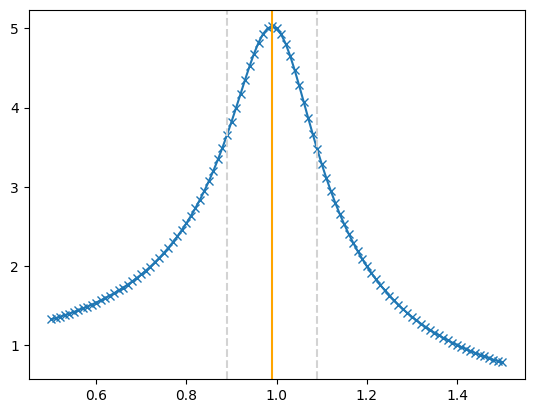

In [3]:
omega = np.linspace(0.5,1.5,101)
omega0 = 1
gammar = 0.1
Omega = omega0*np.sqrt(omega0-2*gammar**2)
A = lambda x:1/np.sqrt((x**2-omega0**2)**2+4*gammar**2*omega0**2*x**2)
plt.plot(omega, A(omega),'x-')
plt.axvline(Omega*(1+gammar), color='lightgrey', linestyle='--')
plt.axvline(Omega*(1-gammar), color='lightgrey', linestyle='--')
plt.axvline(Omega, color='orange')
plt.show()

## Numerical solution

We shall solve numerically the equation
$$
    \ddot x + 2\gamma\omega_0 \dot x + \omega_0^2 x = f(t).
$$
For a numerical solution we split it into two
$$
    \dot x = y,\qquad \dot y = f(t) - 2\gamma \omega_0 y - \omega_0^2 x.
$$
Discretizing with $dt$ we find a recursion in a leap-frog style
$$
    x_{n+1} = x_n + y_n dt,\qquad y_{n+1} = y_n + ( f_n -2\gamma \omega_0 y_n - \omega_0^2 x_n)dt.

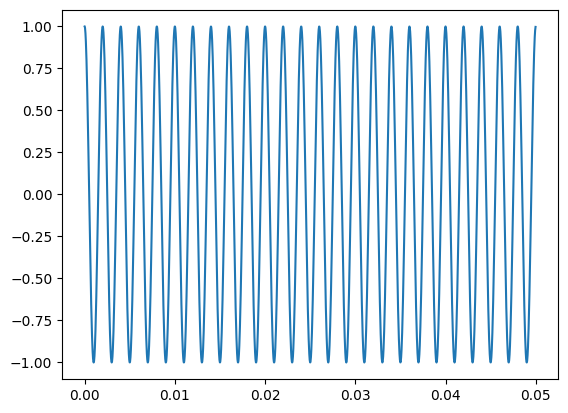

In [4]:
sample_frequency = 44100 #Hz
t0=0
t1=0.05
trange = np.arange(t0,t1,1/sample_frequency)
nu0 = 400
nu = 500
gamma = 0.1
f = np.cos(2*np.pi*nu*trange)
plt.plot(trange,f)

In [5]:
def advance(x, fv, dt, omega, gammar):
    x0, y0 = x[-1]
    x1 = x0 + dt*y0
    y1 = y0 + (fv*np.ones(shape=y0.shape) - omega**2*x1 - 2*gammar*omega*y0)*dt
    x.append([x1,y1])

def amplitude(omega, omega0, gammar):
    return 1/np.sqrt( (omega0**2-omega**2)**2 + 4*gammar**2 * omega**2 * omega0**2)

In [6]:
x = [[np.array([0,0,0]), np.array([0,0,0]) ]]
t0 = 0
t1 = 0.02
sample_frequency = 44100 #Hz
dt = 1/sample_frequency
nu =  np.array([480, 500, 520])

nu0 = 500
gammar = 0.1
ft = lambda t: np.cos(2*np.pi*nu0*t)
trange = np.arange(t0,t1,dt)
for t in trange[1:]:
    advance(x, ft(t), dt, 2*np.pi*nu, gammar)
x=np.array(x)

The resulting parameters: a=0.9994356851511211, b=352.6751334539213


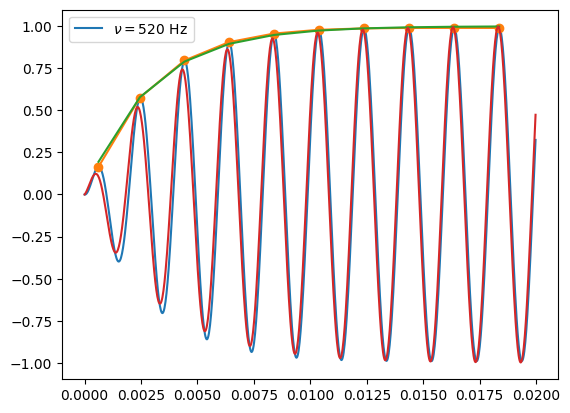

In [7]:
nuindex = 2
Acomp = amplitude(2*np.pi*nu[nuindex], 2*np.pi*nu0, gammar)
data = x[:,0,nuindex]/Acomp
plt.plot(trange, data, label=r'$\nu=$'+f'{nu[nuindex]} Hz')

indices, amplitudes = np.array(sorted(find_maxima(data), key= lambda x: x[0])).T
t = trange[indices.astype(int)]
plt.plot(t,amplitudes,'o-')

def fitfunction(x, a,b):
    return a*(1-np.exp(-b*x))
def loss(params, data, times, fv):
    return np.linalg.norm(fv(times,*params)-data)


L = lambda p:loss(p, amplitudes, t, fitfunction)
a,b = minimize(L, (1, 1000)).x
print(f'The resulting parameters: a={a}, b={b}')
plt.plot(t, fitfunction(t, a, b))

sht = trange-0.32e-3
plt.plot(trange, (1-np.exp(-2*np.pi*nu0*gammar*trange))*ft(sht))

plt.legend()
plt.show()

## Signal reconstruction

Assume that we have a bunch of resonators with frequencies $(\omega_1,\dots,\omega_N)$ and the same relative damping $\gamma$. If the Fourier transform of the intial signal is $f(\omega)$, then in the stationary approximation, i.e. when we neglect the readiness time scale and the phase shifts, the signal in the $i$th oscillator is
$$
    S_i = A_\gamma(\omega_i, \omega) f(\omega),\qquad\mathrm{where}\quad A_\gamma(\omega_i, \omega) = \frac1{\sqrt{(\omega^2-{\omega_i}^2)^2 + 4\gamma^2\omega^2{\omega_i}^2}}.
$$
If we measure the signal in frequencies $(o_1,\dots,o_M)$ angular frequencies, then the signal is a vector $f_\alpha = f(o_\alpha)$, and the mapping performed by the bank of damped oscillators is a matrix
$$
    S_i = A_{i\alpha}f_\alpha,\qquad\mathrm{where}\quad A_{i\alpha} = \frac1{\sqrt{(\omega_i^2-{o_\alpha}^2)^2 + 4\gamma^2\omega_i^2{o_\alpha}^2}}.
$$
If $N\neq M$, then this matrix is not invertible. But we may seek the function with the smallest power that staisfies that the measured signal is the given $S_i$. In matrix notation we may define the loss
$$
    L = \lambda f^\dagger f + (S - Af)^\dagger(S-Af),
$$
and look for the minimum in $f$. Rewriting $L$, and omitting the $f$-independent terms results in
$$
    L = f^\dagger(\lambda + A^\dagger A) f - f^\dagger A^\dagger S -  S^\dagger A f,
$$
and the minimzation yields
$$
    f = (\lambda + A^\dagger A)^{-1} A^\dagger S.
$$